In [1]:
import tweepy
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
from tqdm import *
from googlemaps import *

In [3]:
import itertools
import copy

In [4]:
#Load custom edge list here
edgelist = pd.read_csv('')

In [5]:
edgelist

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0
5,o_rs,y_rs,rs,0.12,red,0
6,y_rs,rs_end_south,rs,0.39,red,0
7,rc_end_north,v_rc,rc,0.70,red,0
8,v_rc,b_rc,rc,0.04,red,0
9,b_rc,g_rc,rc,0.15,red,0


In [6]:
#Load custom node list here
nodelist = pd.read_csv('')
nodelist

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771
5,b_gy2,2000,983
6,b_o,2039,1012
7,b_rc,1311,979
8,b_rd,268,1744
9,b_rd_dupe,268,1744


In [7]:
g = nx.Graph()

In [15]:
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [18]:
for i, nlrow in nodelist.iterrows():
    g.node[nlrow['id']] = nlrow[1:].to_dict()

In [19]:
g.edges(data=True)[0:5]

[('rs_end_north',
  'v_rs',
  {'color': 'red', 'distance': 0.3, 'estimate': 0, 'trail': 'rs'}),
 ('v_rs',
  'b_rs',
  {'color': 'red', 'distance': 0.21, 'estimate': 0, 'trail': 'rs'}),
 ('v_rs',
  'v_bv',
  {'color': 'violet', 'distance': 0.52, 'estimate': 0, 'trail': 'v'}),
 ('v_rs',
  'v_end_east',
  {'color': 'violet', 'distance': 0.54, 'estimate': 0, 'trail': 'v'}),
 ('b_rs',
  'g_rs',
  {'color': 'red', 'distance': 0.11, 'estimate': 0, 'trail': 'rs'})]

In [21]:
g.nodes(data=True)[0:10]

[('rs_end_north', {'X': 1772, 'Y': 172}),
 ('v_rs', {'X': 1793, 'Y': 484}),
 ('b_rs', {'X': 1747, 'Y': 700}),
 ('g_rs', {'X': 1676, 'Y': 775}),
 ('w_rs', {'X': 1646, 'Y': 947}),
 ('o_rs', {'X': 1724, 'Y': 1148}),
 ('y_rs', {'X': 1805, 'Y': 1246}),
 ('rs_end_south', {'X': 1865, 'Y': 1598}),
 ('rc_end_north', {'X': 867, 'Y': 618}),
 ('v_rc', {'X': 1288, 'Y': 934})]

In [20]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

# of edges: 123
# of nodes: 77


In [23]:
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)}


In [24]:
dict(list(node_positions.items())[0:5])

{'b_rs': (1747, -700),
 'g_rs': (1676, -775),
 'rs_end_north': (1772, -172),
 'v_rs': (1793, -484),
 'w_rs': (1646, -947)}

In [26]:
edge_colors = [e[2]['color'] for e in g.edges(data=True)]
edge_colors[0:10]

['red',
 'red',
 'violet',
 'violet',
 'red',
 'blue',
 'blue',
 'red',
 'green',
 'green']

/Users/temp/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/temp/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/temp/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/temp/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

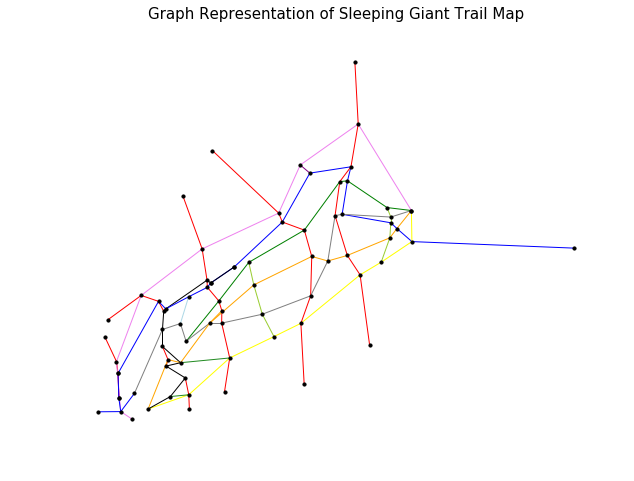

In [27]:
plt.figure(figsize=(8, 6))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=10, node_color='black')
plt.title('Graph Representation of Sleeping Giant Trail Map', size=15)
plt.show()